Objective: Predict whether the cancer is benign or malignant



Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [5]:
# importing data

df = pd.read_csv(r"D:\data spark\ml\Logistic regression Assignment\Assignment 1\data.csv")

In [6]:
df


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [7]:
df.shape

(569, 33)

In [8]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [10]:
df.isnull().sum() 

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [15]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)


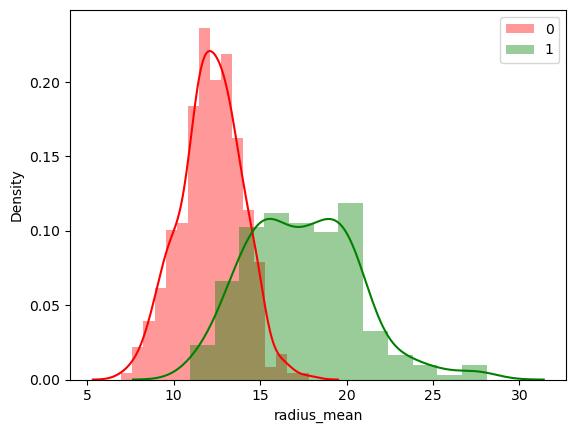

In [18]:
sns.distplot(df[df['diagnosis']=='B']['radius_mean'],color='r',label=0)
sns.distplot(df[df['diagnosis']=='M']['radius_mean'],color='g',label=1)
plt.legend()
plt.show()



When the mean radius is above 15 the chance of Diagnosing malignant is high

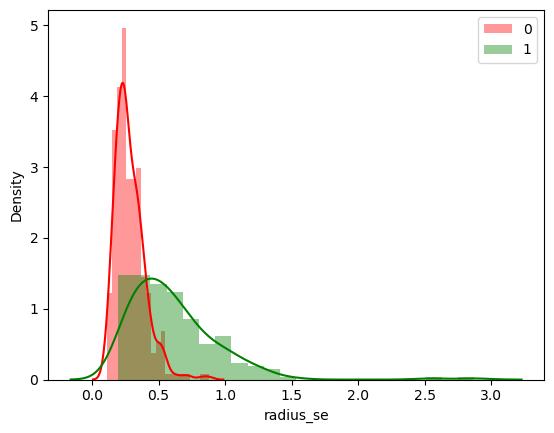

In [19]:
sns.distplot(df[df['diagnosis']=='B']['radius_se'],color='r',label=0)
sns.distplot(df[df['diagnosis']=='M']['radius_se'],color='g',label=1)
plt.legend()
plt.show()

In [20]:
# seperate the independent variables
X = df.loc[:, df.columns != 'diagnosis']  # independent variables

y = df.loc[:, df.columns == 'diagnosis']  # Target variable

In [22]:
# Create the training and test data set in the ratio of 70:30 respectively. Can be of any ratio...

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=70)


In [23]:
X_train.shape,X_test.shape

((398, 30), (171, 30))

In [39]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ClassificationReport, ROCAUC
from sklearn.preprocessing import LabelEncoder

In [56]:
def logistic_regression(X_train, X_test, y_train, y_test):
    algo= []
    tr = []
    te = []
    recall = []
    precision = []
   
    model = LogisticRegression(random_state=7,multi_class='auto')
    model.fit(X_train, y_train)
    y_pred_class=model.predict(X_test)
    y_pred_prob=model.predict_proba(X_test)
    print('\ny_predicted class =',y_pred_class[:5])
    print('\ny_predicted probability =',y_pred_prob[:5,:])
    def draw_cm( actual, predicted ):
        cm = confusion_matrix( actual, predicted)
        sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [0,1] , yticklabels = [0,1] )
        plt.ylabel('Observed')
        plt.xlabel('Predicted')
        plt.show()
    draw_cm(y_test,y_pred_class) 
    y_test_binary = np.where(y_test == 'B', 0, 1)
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_prob[:,1]) 
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    roc_df=pd.DataFrame([fpr,tpr,thresholds]).T
    roc_df.columns=['fpr','tpr','thresholds']
    print(roc_df)
    algo.append('Logistic Regression')
    tr.append(model.score(X_train, y_train))
    te.append(model.score(X_test, y_test))
    recall.append(recall_score(y_test, model.predict(X_test), pos_label='M'))
    precision.append(precision_score(y_test,model.predict(X_test),pos_label='M'))
    results = pd.DataFrame()
    results['Model'] = algo
    results['Training Score'] = tr
    results['Testing Score'] = te
    results['Recall'] = recall
    results['Precision'] = precision
    results = results.set_index('Model')
    print(results)



y_predicted class = ['B' 'B' 'B' 'B' 'M']

y_predicted probability = [[9.99212756e-01 7.87243563e-04]
 [9.92281711e-01 7.71828866e-03]
 [9.94556882e-01 5.44311756e-03]
 [9.95636685e-01 4.36331517e-03]
 [7.71027217e-05 9.99922897e-01]]


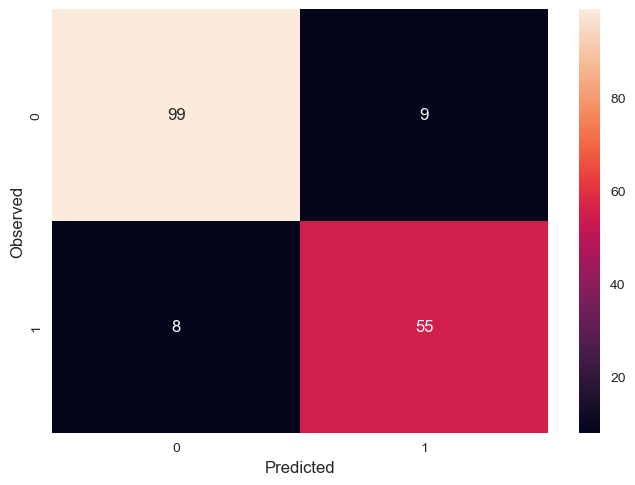

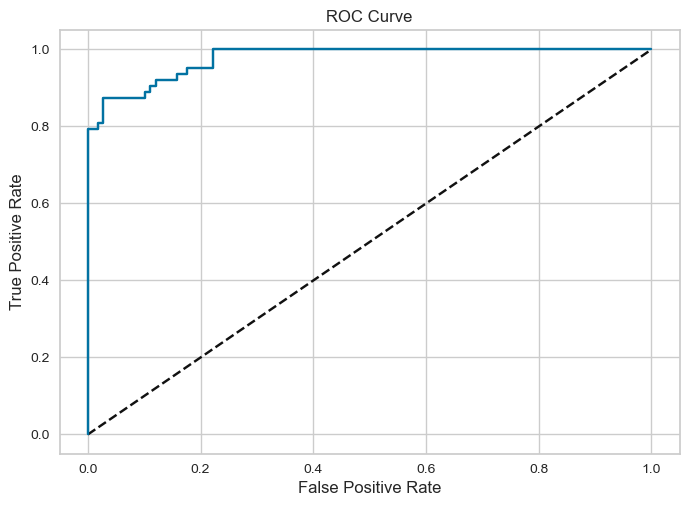

         fpr       tpr  thresholds
0   0.000000  0.000000    2.000000
1   0.000000  0.142857    1.000000
2   0.000000  0.174603    1.000000
3   0.000000  0.793651    0.997996
4   0.018519  0.793651    0.906748
5   0.018519  0.809524    0.883219
6   0.027778  0.809524    0.857926
7   0.027778  0.873016    0.759718
8   0.101852  0.873016    0.205221
9   0.101852  0.888889    0.196737
10  0.111111  0.888889    0.189547
11  0.111111  0.904762    0.173034
12  0.120370  0.904762    0.172784
13  0.120370  0.920635    0.159812
14  0.157407  0.920635    0.105251
15  0.157407  0.936508    0.094643
16  0.175926  0.936508    0.082507
17  0.175926  0.952381    0.078888
18  0.222222  0.952381    0.060216
19  0.222222  1.000000    0.040509
20  1.000000  1.000000    0.000016
                     Training Score  Testing Score    Recall  Precision
Model                                                                  
Logistic Regression        0.959799       0.900585  0.873016   0.859375


In [57]:
logistic_regression(X_train, X_test, y_train, y_test)